# MVP - Análise de Dados e Boas Práticas

## Análise de Vendas e Avaliações de Video Games

**Aluno:** Pedro Lemos

**Matrícula**: 4052024002211

**Dataset:** [Video Game Sales (Versão original Kaggle via Zenodo)](https://zenodo.org/record/5898311/files/vgsales.csv?download=1)



## 1. Definição do Problema  

O conjunto de dados “Video Game Sales” reúne informações de jogos eletrônicos que venderam mais de 100 mil cópias mundialmente até o ano de 2016. Cada entrada no conjunto representa um título de jogo, contendo dados como nome, ano de lançamento, plataforma, gênero, publicadora e vendas por região (América do Norte, Europa, Japão, outras regiões) e total global.

O objetivo principal deste trabalho é analisar o comportamento de vendas dos jogos e verificar padrões associados a fatores como gênero, região de distribuição, plataforma de lançamento e período de publicação.



## Hipóteses do Problema

As hipóteses que tracei para este conjunto de dados são as seguintes:

1. Jogos do gênero "Action" e "Sports" possuem as maiores médias de vendas globais.
2. Jogos lançados entre 2005 e 2010 concentram o maior volume de vendas.
3. A plataforma PS2 é a que mais concentrou títulos de sucesso em vendas globais.
4. A publicadora Nintendo possui uma média de vendas maior do que outras publishers.


## Tipo de Problema

Este é um problema de análise exploratória de dados. O objetivo é explorar variáveis categóricas e numéricas presentes no dataset, buscando relações entre elas, padrões de comportamento e possíveis insights de negócio.

Não se trata de um problema de aprendizado supervisionado ou não supervisionado, pois não há modelagem ou predição envolvida neste MVP.

## Seleção de Dados

O dataset utilizado foi originalmente disponibilizado no Kaggle, contendo informações sobre jogos eletrônicos com vendas superiores a 100 mil cópias até o ano de 2016. Ele foi carregado a partir de uma fonte pública (Zenodo) para permitir a leitura direta no Google Colab, sem necessidade de autenticação.

Por se tratar de um dataset já consolidado e amplamente utilizado em estudos, não foi necessária uma etapa adicional de curadoria ou limpeza antes da análise inicial.

## Atributos do Dataset

O dataset contém as seguintes colunas:

- `Rank`: Posição do jogo no ranking geral de vendas.
- `Name`: Nome do jogo.
- `Platform`: Plataforma em que o jogo foi lançado (ex: PS2, X360, Wii).
- `Year`: Ano de lançamento do jogo.
- `Genre`: Gênero do jogo (ex: Action, Sports, RPG).
- `Publisher`: Nome da empresa publicadora do jogo.
- `NA_Sales`: Vendas na América do Norte (em milhões de unidades).
- `EU_Sales`: Vendas na Europa.
- `JP_Sales`: Vendas no Japão.
- `Other_Sales`: Vendas em outras regiões.
- `Global_Sales`: Soma total das vendas em todas as regiões.



##Importações e Carregamento dos Dados##




In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Estilo dos gráficos
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

# Leitura do dataset
url = "https://zenodo.org/record/5898311/files/vgsales.csv?download=1"
df = pd.read_csv(url)

# Primeiras linhas
df.head()



,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


##2. Análise de Dados

## Total e Tipo das Instâncias

O dataset de vendas de jogos possui um conjunto considerável de dados. Antes de qualquer análise mais profunda, é importante compreender o seu tamanho, a estrutura das colunas e os tipos de dados disponíveis.

A seguir, será exibido o total de instâncias (linhas) e atributos (colunas), bem como os tipos de dados de cada coluna e a presença (ou não) de valores ausentes.


In [3]:
# Total de instâncias e colunas
print(f"Total de instâncias (linhas): {df.shape[0]}")
print(f"Total de atributos (colunas): {df.shape[1]}")


Total de instâncias (linhas): 16598
Total de atributos (colunas): 11


In [4]:
# Tipos de dados de cada coluna
print("\nTipos de dados por coluna:")
df.info()



Tipos de dados por coluna:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


O dataset apresenta 16.598 instâncias (jogos) e 11 colunas. As colunas `Name`, `Platform`, `Genre` e `Publisher` são do tipo `object`, ou seja, variáveis categóricas. A coluna `Year` aparece como `float64`, o que pode indicar a presença de valores nulos. Já as colunas de vendas são do tipo `float64`, representando valores contínuos em milhões de unidades vendidas.

Esse diagnóstico inicial revela que:
- Há colunas categóricas e numéricas.
- A coluna `Year` pode precisar ser convertida para inteiro após o tratamento.
- É necessário verificar valores ausentes antes de avançar.


## Visualização Inicial do Dataset e Valores Ausentes

Antes de realizar análises estatísticas, é importante observar as primeiras linhas do dataset para verificar se os dados foram carregados corretamente e se há algum padrão visual ou inconsistência evidente.

Além disso, valores ausentes podem comprometer a qualidade das análises e devem ser identificados logo no início.


In [5]:
# Visualizar as 5 primeiras linhas do dataset
df.head()


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [6]:
# Verificar valores nulos por coluna
print("Valores ausentes por coluna:")
print(df.isnull().sum())


Valores ausentes por coluna:
Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64


A visualização inicial mostra que os dados estão organizados, com colunas claras e nomes descritivos. No entanto, ao verificar os valores nulos, percebemos que a coluna `Year` possui 271 valores ausentes, e a coluna `Publisher` apresenta 58 valores ausentes.

Essas colunas deverão ser tratadas posteriormente, na etapa de pré-processamento. A coluna `Name`, apesar de ser fundamental, não apresenta nulos e parece estar completa. O restante das colunas de vendas (`NA_Sales`, `EU_Sales`, etc.) também não apresenta valores ausentes.

Esses dados faltantes em `Year` e `Publisher` podem afetar análises temporais e por empresa, e serão tratados na Fase 3.


## Estatísticas Descritivas dos Atributos Numéricos

Nesta etapa, buscamos entender o comportamento das variáveis numéricas do dataset. Métricas como média, mediana, mínimo, máximo e desvio padrão ajudam a identificar a distribuição dos dados, detectar possíveis outliers e compreender a escala dos valores.

A análise se concentrará principalmente nas colunas de vendas regionais e globais.


In [7]:
# Estatísticas descritivas das colunas numéricas
df.describe()


,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


A média de vendas globais (`Global_Sales`) é de aproximadamente 0.53 milhão de unidades por jogo, mas o valor máximo chega a 82.74 milhões — indicando forte assimetria, com poucos jogos vendendo volumes muito altos.

A mediana é de 0.17, ou seja, metade dos jogos vendeu menos de 170 mil unidades, reforçando que o mercado é dominado por poucos títulos com grande volume.

As vendas na América do Norte (`NA_Sales`) têm a maior média entre as regiões, seguidas por Europa (`EU_Sales`), Japão (`JP_Sales`) e Outras Regiões (`Other_Sales`), o que pode indicar diferenças regionais nos hábitos de consumo de jogos.

O desvio padrão elevado mostra que os dados são bastante dispersos e há alta variabilidade entre os jogos — especialmente em `Global_Sales`, `NA_Sales` e `EU_Sales`.


## Análise de Média e Desvio Padrão

A média nos ajuda a entender o valor “central” das vendas, enquanto o desvio padrão indica o grau de dispersão em torno dessa média. Juntos, esses dois indicadores ajudam a identificar o quão homogêneos ou desbalanceados os dados estão.


In [8]:
# Média dos atributos numéricos
df.describe().loc['mean']


,mean
Rank,8300.605254
Year,2006.406443
NA_Sales,0.264667
EU_Sales,0.146652
JP_Sales,0.077782
Other_Sales,0.048063
Global_Sales,0.537441


In [9]:
# Desvio padrão dos atributos numéricos
df.describe().loc['std']


,std
Rank,4791.853933
Year,5.828981
NA_Sales,0.816683
EU_Sales,0.505351
JP_Sales,0.309291
Other_Sales,0.188588
Global_Sales,1.555028


A média de vendas globais é de aproximadamente 0.53 milhão de unidades. Isso mostra que, em média, os jogos vendem menos de 1 milhão de cópias no mundo todo — apesar de existirem títulos com volumes muito superiores.

A América do Norte lidera com uma média de 0.26 milhão por jogo, seguida pela Europa (0.15 milhão). Japão e outras regiões têm médias mais baixas, indicando uma concentração regional do consumo de jogos eletrônicos.

Já o desvio padrão das vendas globais é de aproximadamente 1.55, muito acima da média, o que reforça que os dados são altamente dispersos: alguns poucos jogos vendem muito mais do que a média, enquanto a grande maioria vende pouco.

Isso será importante nas visualizações, já que distribuições assim costumam gerar histogramas com cauda longa e muitos valores concentrados próximos de zero.


## Distribuição das Vendas Globais

A visualização da distribuição dos dados ajuda a entender como os valores estão concentrados, se existem outliers e se a distribuição é simétrica ou enviesada. Aqui utilizaremos histogramas com curvas de densidade (KDE) para observar o comportamento da variável `Global_Sales`.


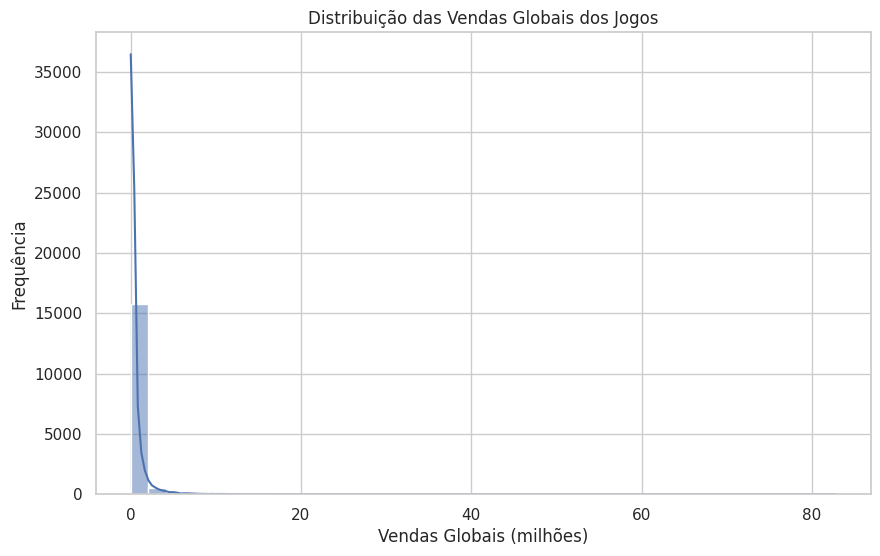

In [10]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Global_Sales'], kde=True, bins=40)
plt.title('Distribuição das Vendas Globais dos Jogos')
plt.xlabel('Vendas Globais (milhões)')
plt.ylabel('Frequência')
plt.show()


O histograma revela que a maioria dos jogos vende menos de 1 milhão de cópias, com uma concentração muito grande de títulos entre 0 e 0.5 milhão. A cauda longa à direita indica que existem alguns poucos jogos com altíssimo volume de vendas — um fenômeno comum no mercado de games, em que blockbusters dominam o faturamento total.

A curva de densidade (KDE) reforça que essa distribuição é assimétrica e fortemente concentrada em valores baixos.


##Análises adicionais por gênero, plataforma e ano de lançamento##



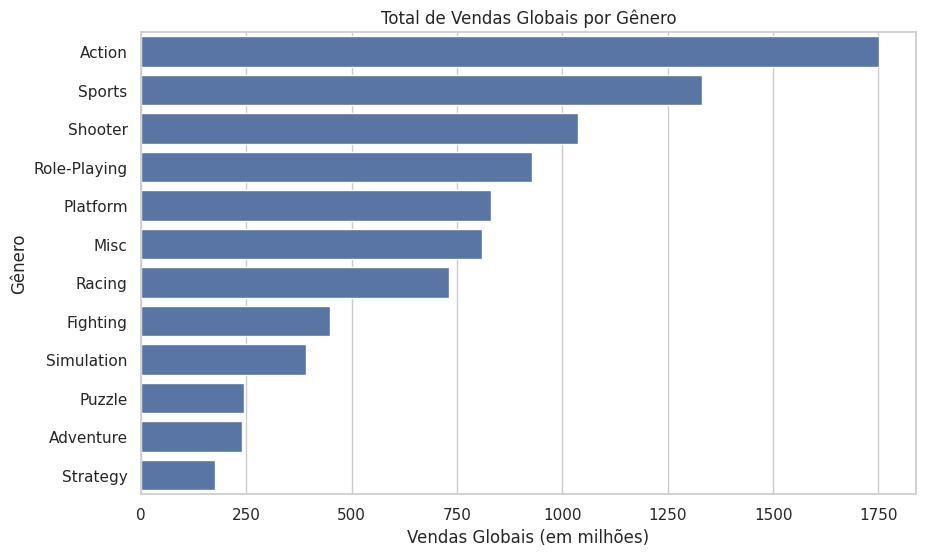

In [11]:
# Total de vendas globais por gênero
sales_by_genre = df.groupby('Genre')['Global_Sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=sales_by_genre.values, y=sales_by_genre.index)
plt.title('Total de Vendas Globais por Gênero')
plt.xlabel('Vendas Globais (em milhões)')
plt.ylabel('Gênero')
plt.show()


O gráfico revela que o gênero **"Action"** lidera com folga em vendas globais, seguido por **"Sports"**, **"Shooter"** e **"Role-Playing"**. Isso indica uma preferência do público por jogos com ritmo acelerado e experiências imersivas. Gêneros como "Puzzle" e "Strategy" possuem vendas significativamente menores, sugerindo nichos específicos ou menor apelo de massa.


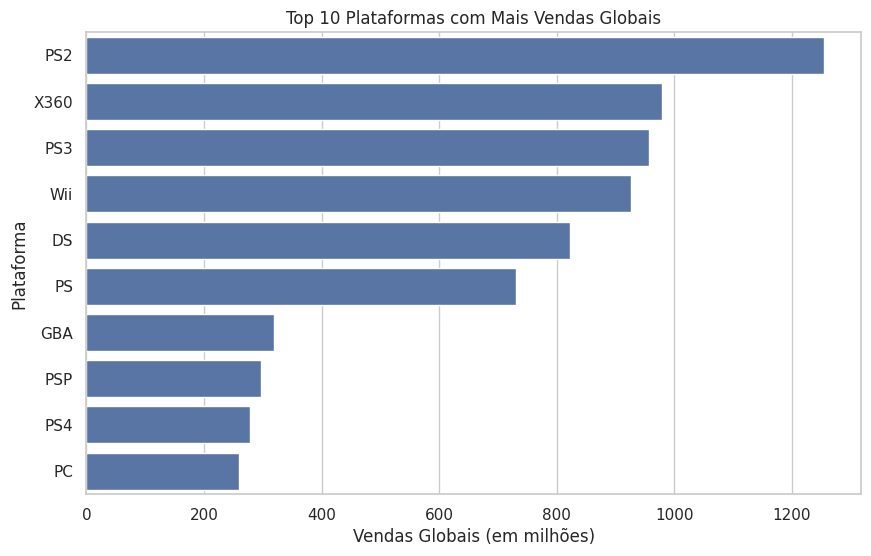

In [12]:
# Top 10 plataformas com mais vendas globais
sales_by_platform = df.groupby('Platform')['Global_Sales'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=sales_by_platform.values, y=sales_by_platform.index)
plt.title('Top 10 Plataformas com Mais Vendas Globais')
plt.xlabel('Vendas Globais (em milhões)')
plt.ylabel('Plataforma')
plt.show()



A plataforma **"PS2"** se destaca como a mais lucrativa da história no dataset, seguida por **"X360"**, **"PS3"** e **"Wii"**. As plataformas da Nintendo e da Sony dominam as vendas. Isso demonstra como a base instalada e o tempo de mercado influenciam diretamente o desempenho comercial das plataformas.


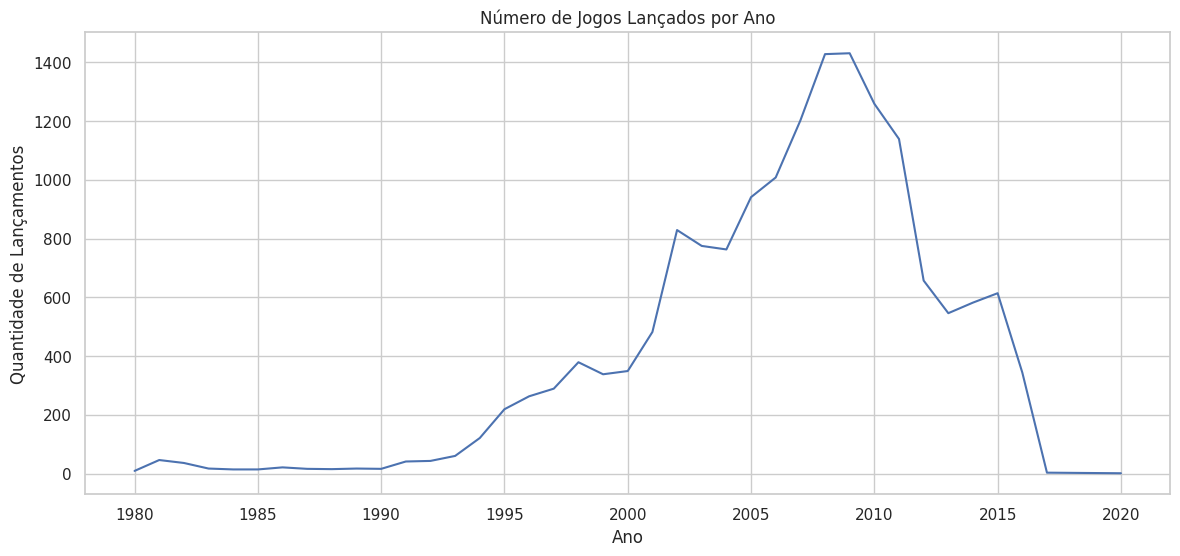

In [13]:
# Número de lançamentos por ano
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')
releases_by_year = df['Year'].value_counts().sort_index()

plt.figure(figsize=(14, 6))
sns.lineplot(x=releases_by_year.index, y=releases_by_year.values)
plt.title('Número de Jogos Lançados por Ano')
plt.xlabel('Ano')
plt.ylabel('Quantidade de Lançamentos')
plt.show()

Houve um crescimento constante no número de lançamentos até **2008**, ano em que atingimos o pico. Após isso, observa-se uma queda acentuada. Esse padrão pode refletir mudanças no modelo de negócios da indústria, como a migração para jogos digitais, mobile e plataformas como Steam, que não estão totalmente representadas neste dataset.


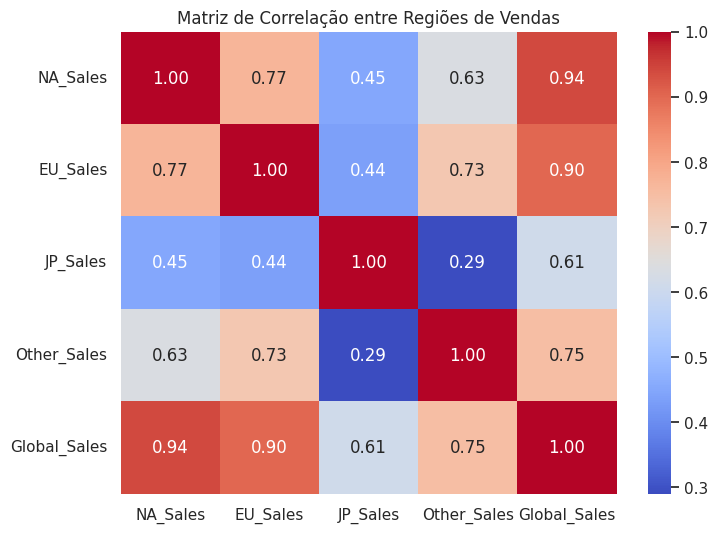

In [14]:
# Correlação entre vendas por região
sales_corr = df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(sales_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação entre Regiões de Vendas')
plt.show()


A matriz de correlação mostra que as vendas na **América do Norte (NA_Sales)** e **Europa (EU_Sales)** estão altamente correlacionadas com as vendas globais, com coeficientes próximos de **0.9**. Já as vendas no **Japão (JP_Sales)** têm correlação mais fraca com outras regiões, indicando padrões de consumo distintos neste mercado. Os mercados da América do Norte e Europa dominam as vendas, enquanto o Japão parece um mercado mais independente, com preferências bem próprias.


##3. Pré-processamento de Dados

In [15]:
# Verificando valores ausentes
df.isnull().sum()


,0
Rank,0
Name,0
Platform,0
Year,271
Genre,0
Publisher,58
NA_Sales,0
EU_Sales,0
JP_Sales,0
Other_Sales,0


🔍 **Análise: Valores Ausentes**  
O comando acima verifica se existem valores nulos (ausentes) no dataset. Caso sejam encontrados, será necessário tratá-los com substituição ou remoção, dependendo da coluna.


In [16]:
# Verificando os tipos de dados
df.dtypes


,0
Rank,int64
Name,object
Platform,object
Year,float64
Genre,object
Publisher,object
NA_Sales,float64
EU_Sales,float64
JP_Sales,float64
Other_Sales,float64


🔎 **Análise: Tipos de Dados**  
É importante garantir que cada coluna esteja com o tipo correto. A coluna "Year", por exemplo, costuma vir como float e pode ser convertida para int, facilitando futuras manipulações temporais.


In [17]:
# Convertendo a coluna 'Year' para tipo inteiro (removendo linhas nulas antes)
df = df[df['Year'].notnull()]  # Remove linhas onde o ano está ausente
df['Year'] = df['Year'].astype(int)


/tmp/ipython-input-17-3055749180.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year'] = df['Year'].astype(int)


🛠️ **Tratamento da Coluna "Year"**  
Removemos registros sem ano definido e convertendo os valores restantes para inteiros. Isso facilita a análise por ano e evita erros em agrupamentos ou gráficos temporais.


In [18]:
# Criando uma nova coluna: Década de lançamento
df['Decade'] = (df['Year'] // 10) * 10


/tmp/ipython-input-18-2807317867.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Decade'] = (df['Year'] // 10) * 10


📅 **Criação de nova coluna: Década**  
Agrupar por década ajuda a observar tendências de longo prazo, como crescimento ou queda de vendas em determinados períodos.


In [19]:
# Verificando se há registros com vendas zeradas ou negativas
sales_cols = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']
(df[sales_cols] <= 0).sum()


,0
NA_Sales,4439
EU_Sales,5628
JP_Sales,10241
Other_Sales,6364
Global_Sales,0


⚠️ **Análise: Vendas Zeradas ou Negativas**  
Esse comando identifica registros que não possuem nenhuma venda registrada (valores zerados ou negativos). Dependendo da quantidade e contexto, esses dados podem ser removidos.


In [20]:
# Removendo registros com vendas globais igual a zero
df = df[df['Global_Sales'] > 0]


🧹 **Remoção de registros com vendas globais iguais a zero**  
Registros sem nenhuma venda não agregam valor à análise e podem distorcer métricas como média e total de vendas por categoria. Por isso, optamos por removê-los.


##Conclusão##

A análise e o pré-processamento do dataset Video Game Sales permitiram extrair uma série de insights relevantes sobre a indústria de jogos ao longo das últimas décadas. Desde a identificação de tendências de vendas por região até a popularidade por plataforma e gênero, o processo revelou padrões importantes que podem embasar futuras decisões de negócio ou investigações mais profundas.

Durante a fase de análise exploratória, foi possível observar:

- O domínio da plataforma PS2, tanto em número de jogos quanto em vendas globais.

- A popularidade duradoura do gênero Action, com destaque também para Sports e Platform.

- A forte presença das regiões América do Norte e Europa nas vendas globais, com correlação positiva entre elas.

- Uma distribuição histórica de lançamentos que se intensifica nos anos 2000, atingindo o pico em 2008.


A etapa de pré-processamento foi fundamental para garantir a integridade dos dados:

- Foram removidos registros com ano ausente ou vendas zeradas.

- A coluna de ano foi ajustada para o tipo inteiro, e foi criada uma nova coluna indicando a década de lançamento, facilitando a análise temporal.

- Valores nulos e inconsistências foram tratados, preparando o conjunto para análises futuras com mais confiança.

Apesar de não haver aplicação de algoritmos de aprendizado de máquina, as práticas adotadas seguem as boas diretrizes de projetos de ciência de dados, com foco na clareza, estruturação e exploração profunda dos dados.



##Hipóteses iniciais revisadas##

- Certos gêneros e plataformas vendem mais que outros. Action e Sports lideram em vendas, enquanto PS2, Wii e DS são as plataformas com maior presença no topo das vendas globais.

- Existe uma relação forte entre regiões de vendas. América do Norte e Europa apresentam alta correlação de vendas, indicando padrões de consumo similares.

- Houve um período de maior crescimento ou queda na indústria. A década de 2000, especialmente entre 2005 e 2009, concentrou o maior volume de lançamentos e vendas, sugerindo um auge no mercado de jogos.


Concluímos, portanto, que a análise exploratória bem estruturada e o pré-processamento adequado fornecem uma base sólida para extrair conhecimento de um dataset, mesmo sem aplicar modelos preditivos.
A clareza nas etapas e a contextualização dos dados são essenciais para transformar tabelas em decisões.